In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data= pd.read_excel(r'D:\Coding\python\OnlineRetail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [25]:
data['StockCode'].value_counts()

StockCode
85123A    1908
85099B    1855
20725     1484
47566     1318
22383     1264
          ... 
21923        1
20896        1
20825        1
85060        1
47591b       1
Name: count, Length: 3845, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.518434
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,14367.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15287.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16255.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1484.746041


In [4]:
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate'])

In [5]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [10]:
data['StockCode'].value_counts()

StockCode
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: count, Length: 4070, dtype: int64

In [11]:
data.shape

(536641, 8)

Checking for outliers

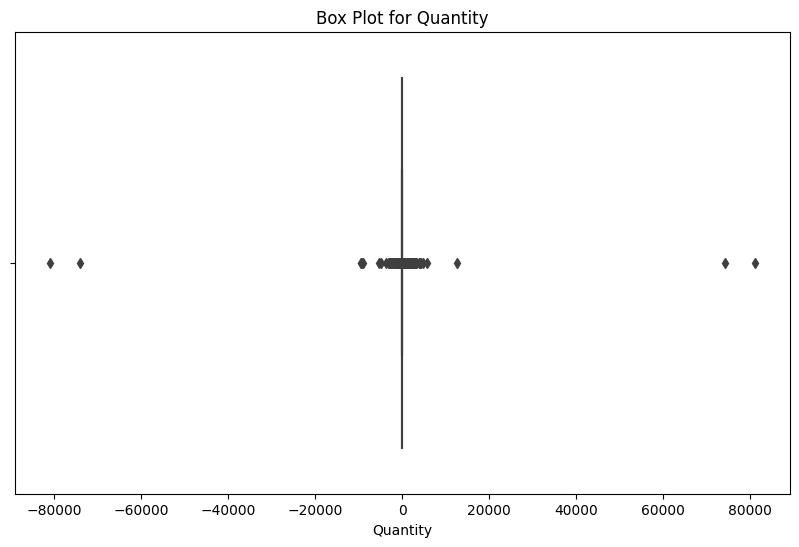

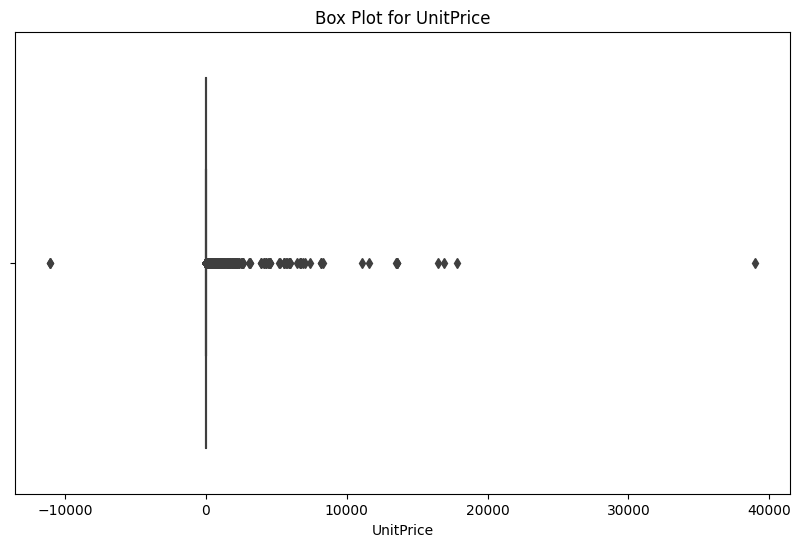

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quantity', data= data)
plt.title('Box Plot for Quantity')
plt.show()

# Box plot for UnitPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='UnitPrice', data=data)
plt.title('Box Plot for UnitPrice')
plt.show()

Removing Outliers

In [6]:
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return filtered_df

data = remove_outliers(data, 'Quantity')

data = remove_outliers(data, 'UnitPrice')

data.reset_index(drop=True, inplace=True)

<Axes: xlabel='Quantity'>

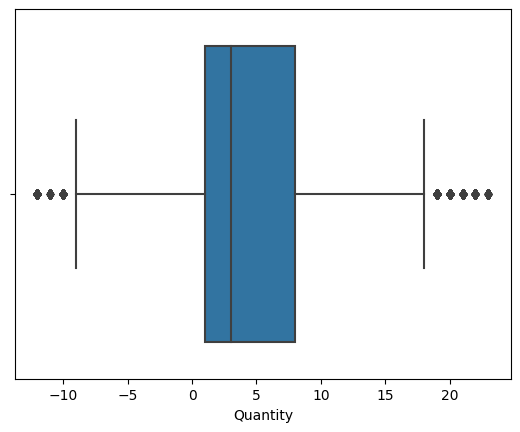

In [14]:
sns.boxplot(x='Quantity', data= data)

<Axes: xlabel='UnitPrice'>

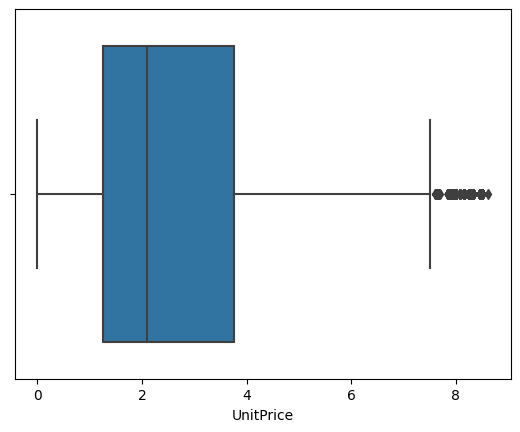

In [15]:
sns.boxplot(x='UnitPrice', data=data)

<Axes: xlabel='Quantity', ylabel='Count'>

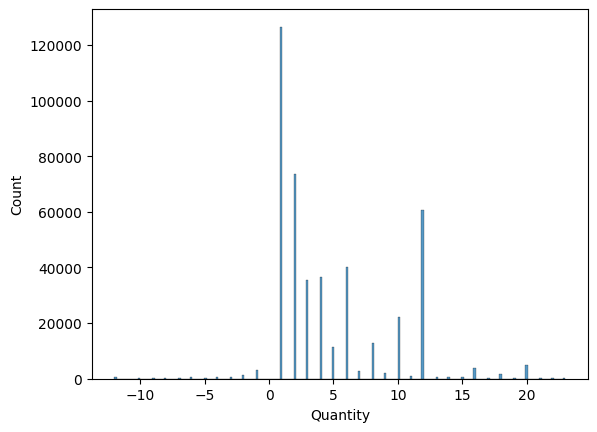

In [16]:
sns.histplot(x='Quantity', data=data)

<Axes: xlabel='UnitPrice', ylabel='Count'>

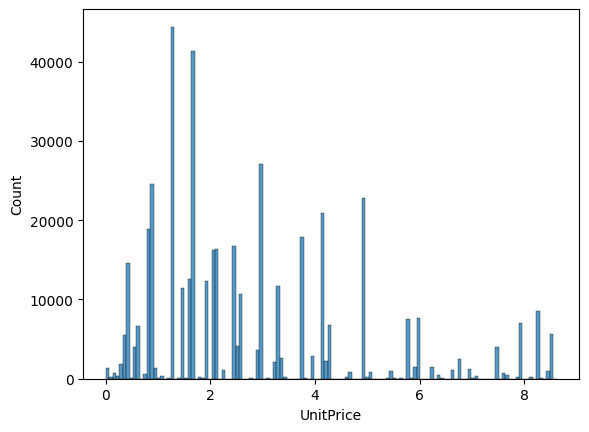

In [17]:
sns.histplot(x='UnitPrice', data=data)

In [7]:
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Group by Year-Month and sum the Quantity for each group
monthly_quantity = data.groupby('YearMonth')['Quantity'].sum()

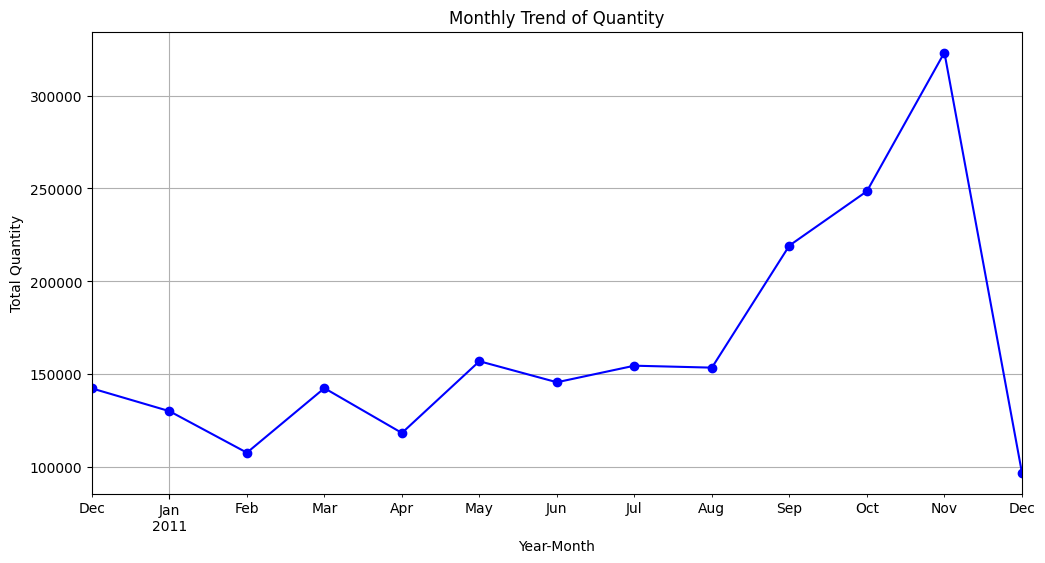

In [8]:
plt.figure(figsize=(12, 6))
monthly_quantity.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Trend of Quantity')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

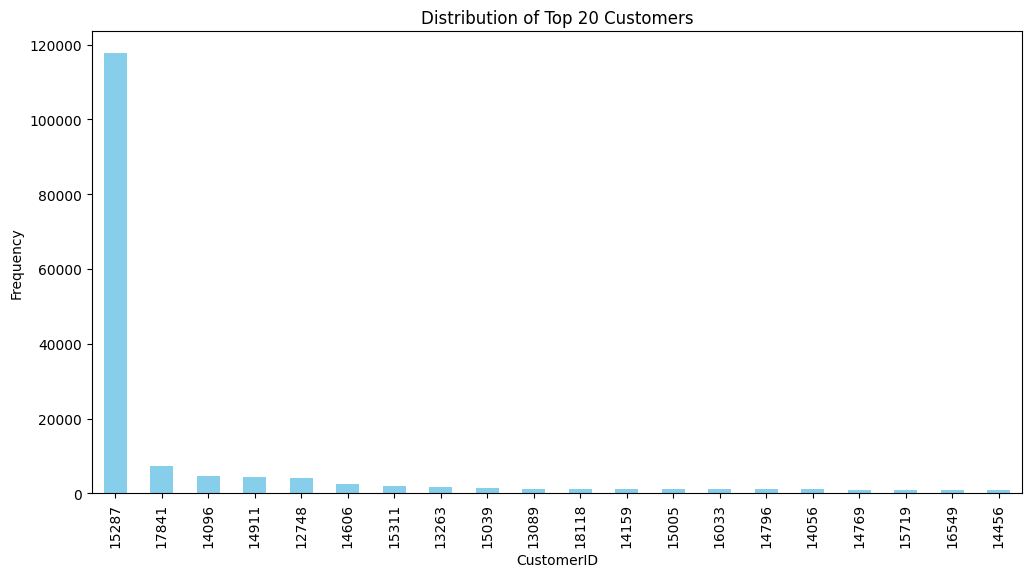

In [21]:
customer_distribution = data['CustomerID'].value_counts()

plt.figure(figsize=(12, 6))
customer_distribution.head(20).plot(kind='bar', color='skyblue')
plt.title(f'Distribution of Top 20 Customers')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

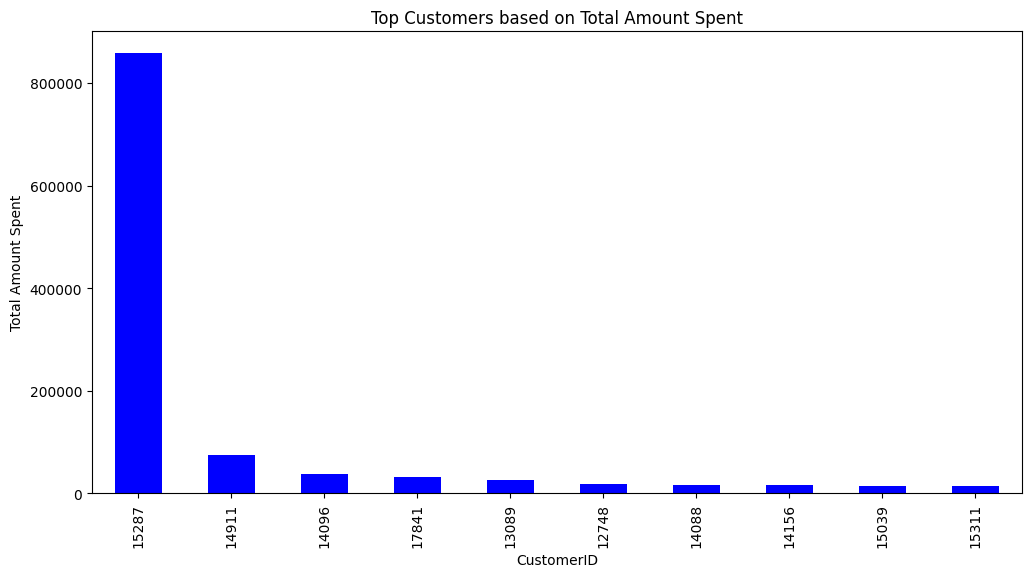

In [9]:
data['AmountSpent'] = data['Quantity'] * data['UnitPrice']

top_customers_amount = data.groupby('CustomerID')['AmountSpent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_customers_amount.plot(kind='bar', color='blue')
plt.title('Top Customers based on Total Amount Spent')
plt.xlabel('CustomerID')
plt.ylabel('Total Amount Spent')
plt.show()

# Identify top customers based on total quantity purchased
top_customers_quantity = data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)


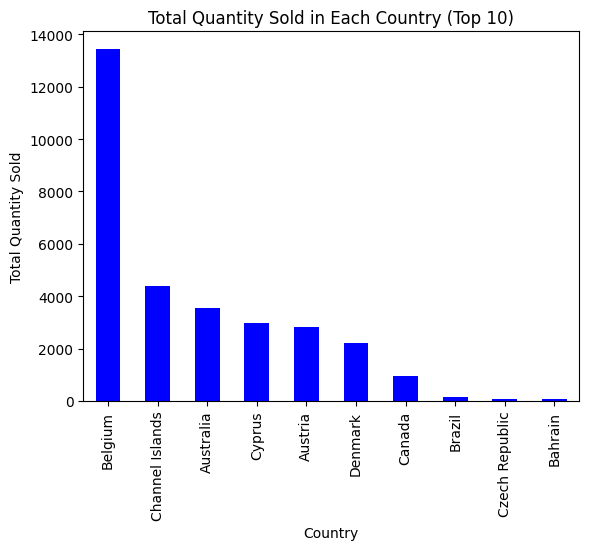

In [26]:
quantity_sold_country= data.groupby('Country')['Quantity'].sum().head(10).sort_values(ascending=False)
quantity_sold_country.plot(kind='bar', color='blue')
plt.title('Total Quantity Sold in Each Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.show()

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34


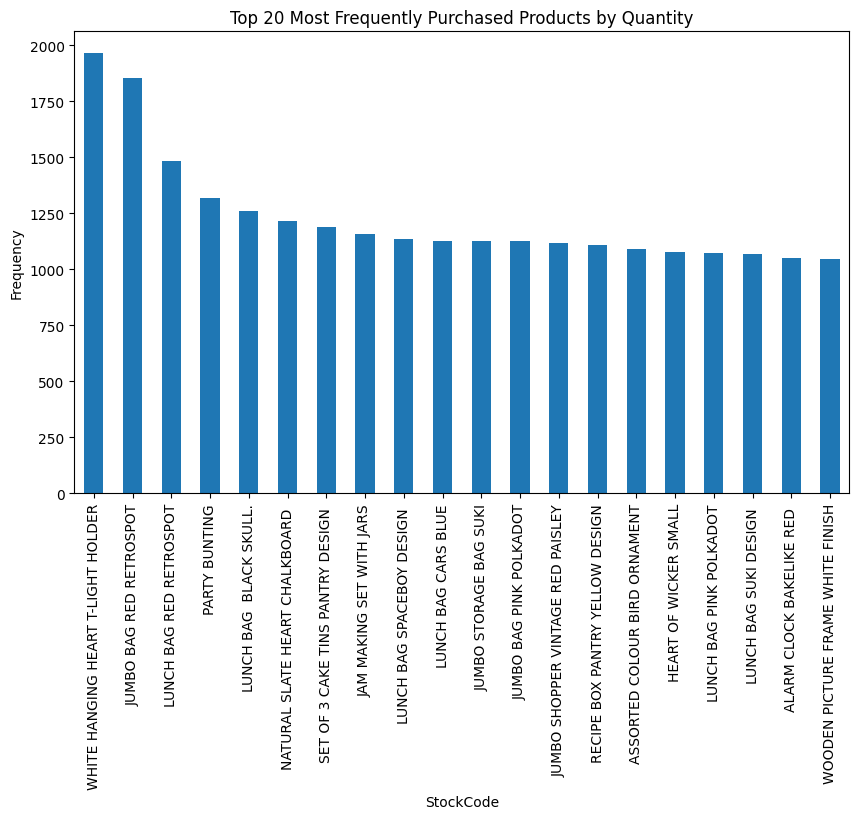

In [43]:
plt.figure(figsize=(10, 6))
data['Description'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Most Frequently Purchased Products by Quantity')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.show()

In [70]:
h= data.groupby('StockCode')['Quantity'].sum().idxmax()
l=data.groupby('StockCode')['Quantity'].sum().idxmin()
data.loc[data['StockCode']==h]['Description'].unique()[0]
print('Highest selling product:\n Stock Code: '+h+'\n Description: '+ data.loc[data['StockCode']==h]['Description'].unique()[0])
print()
print('Lowest selling product:\n Stock Code: ',l,'\n Description: ', data.loc[data['StockCode']==l]['Description'].unique()[0])

Highest selling product:
 Stock Code: 85099B
 Description: JUMBO BAG RED RETROSPOT

Lowest selling product:
 Stock Code:  21361 
 Description:  nan


In [72]:
total_invoice_value = data.groupby('InvoiceNo')['AmountSpent'].sum()
average_items_per_invoice = data.groupby('InvoiceNo')['Quantity'].sum().mean()

average_invoice_value = total_invoice_value.mean()

print(f'Average Number of Items per Invoice: {average_items_per_invoice:.2f}')
print(f'Average Invoice Value: {average_invoice_value:.2f}')

Average Number of Items per Invoice: 98.33
Average Invoice Value: 219.29


In [77]:
import datetime as dt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

current_date = data['InvoiceDate'].max() + pd.DateOffset(1)  # Adding one day to the maximum date
rfm_df = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'AmountSpent': 'sum'                                     # Monetary
}).reset_index()

rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#print(rfm_df.head())

rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

print('\n\t\t\tCustomer Segmentation:\n\n')
print(rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}))


			Customer Segmentation:


            Recency    Frequency       Monetary  Count
Cluster                                               
0        189.631240     2.109501     350.473834    621
1         18.552261     7.013126    1447.070671   2057
2          1.000000  2348.000000  857815.080000      1
3         78.970019     2.852998     580.996956   1034
4        309.570850     1.455466     237.562692    494


c:\Users\aclog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
